In [18]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import cv2
import rasterio

mask out of range

In [ ]:
import os
import rasterio
import numpy as np

count = 0
img_path = './dataset/train_img'
mask_path = './dataset/train_mask'
img_list = os.listdir(img_path)
mask_fix_list=[]


for img_name in img_list:
    img_file = os.path.join(img_path, img_name)
    mask_name = img_name.replace('img', 'mask')
    mask_file = os.path.join(mask_path, mask_name)
    
    mask = rasterio.open(mask_file).read().transpose(1, 2, 0)
    img = rasterio.open(img_file).read().transpose(1, 2, 0)
    
    m = np.ma.masked_where(img[:, :, -2] != 0, mask[:, :, 0])
    new_mask = np.where(m.data, m.mask, 0)
    
    mask_zero_count = np.count_nonzero(mask[:, :, 0] == 0)
    new_zero_count = np.count_nonzero(new_mask == 0)
    
    if mask_zero_count != new_zero_count:
        print(img_name)
        mask_fix_list.append(img_name)
        count += 1
print(count)

train_exclude_path='./dataset/train_exclude_list.csv'
train_exclude_df = pd.DataFrame({'train_exclude_cases': mask_fix_list})
train_exclude_df.to_csv(train_exclude_path, index=False)
print(f'Data has been written to {train_exclude_path}')

In [ ]:
case_dataframe = pd.read_csv(train_exclude_path)
case_names=case_dataframe['train_exclude_cases']
len(case_names)

making new train/test dataset

In [ ]:
import pandas as pd
exclude_dataframe = pd.read_csv(train_exclude_path)
exclude_case=exclude_dataframe['train_exclude_cases']


np.intersect1d()

In [9]:
train_imgs = glob('./dataset/train_img/*.tif')
test_imgs = glob('./dataset/test_img/*.tif')
print(train_imgs[5])
train_masks = glob('./dataset/train_mask/*.tif')

./dataset/train_img/train_img_30851.tif


In [10]:
import pandas as pd
pd.read_csv('./dataset/train_meta.csv').shape

(33575, 2)

### Additional Infos

In [5]:
mask.sum().sum()

NameError: name 'mask' is not defined

In [7]:
data = rasterio.open(train_imgs[20])
data.profile

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 256, 'height': 256, 'count': 10, 'crs': CRS.from_epsg(32652), 'transform': Affine(30.0, 0.0, 591585.0,
       0.0, -30.0, 7094115.0), 'blockysize': 1, 'tiled': False, 'interleave': 'pixel'}

In [8]:
data.bounds

BoundingBox(left=591585.0, bottom=7086435.0, right=599265.0, top=7094115.0)

In [9]:
data.lnglat()

(130.94606297378988, 63.926457531099224)

In [10]:
data.res

(30.0, 30.0)

### channel by channel

In [28]:
img_num = 60

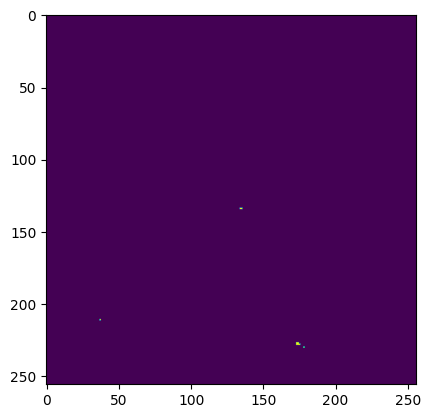

In [29]:
mask = rasterio.open(train_masks[img_num]).read().transpose(1,2,0)
plt.imshow(mask)

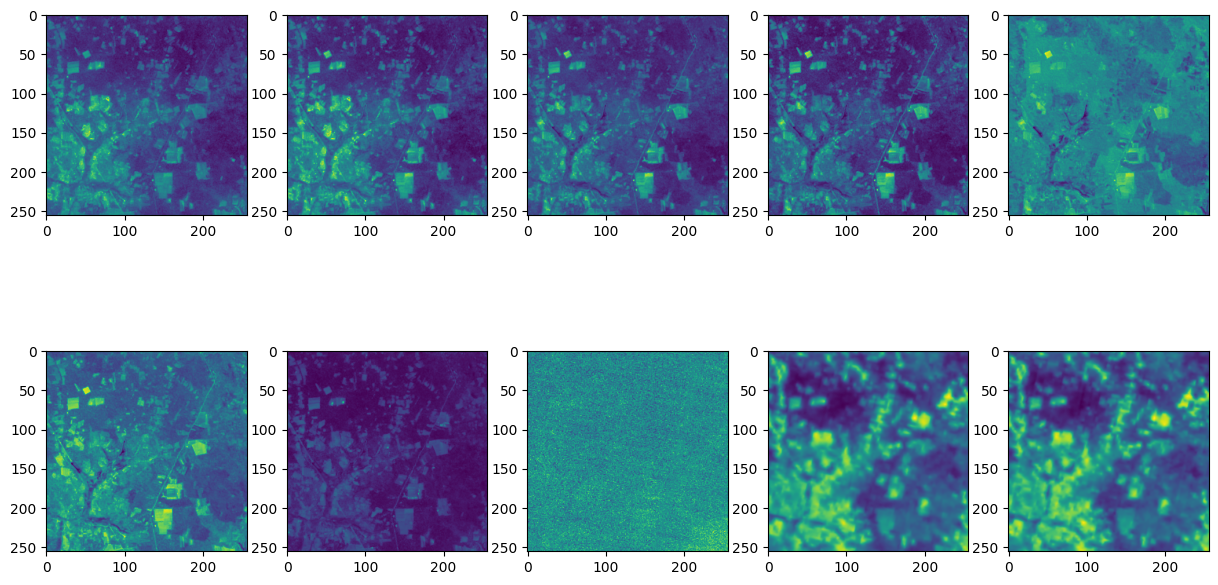

In [30]:
img = rasterio.open(train_imgs[img_num]).read().transpose(1,2,0)
img_8 = img/(2**16)

fig,axs = plt.subplots(2,5)
fig.set_figheight(8)
fig.set_figwidth(15)
for i in range(2):
    for j in range(5):
        axs[i,j].imshow(img_8[:,:,i*5+j])

In [23]:
print(np.count_nonzero(mask[:,:,0]==0))
m=np.ma.masked_where(mask[:,:,0]==0, img_8[:,:,-2])
print(m.data)
print(m.mask)
print(np.ma.compressed(m))
#mask value 가 1인 경우에 대하여 이미지 값들 출력


m=np.ma.masked_where(img_8[:,:,-2]!=0, mask[:,:,0])
print(m.data.shape) #(256, 256)
print(m.mask.shape) #(256, 256)
new_mask= np.where(m.data, m.mask, 0)
#이미지값이 0인 곳에 대하여 마스크 값 출력 이후 이를 0으로 변경

print(new_mask)

print(np.count_nonzero(mask[:,:,0]==0))
print(np.count_nonzero(new_mask==0))



'''array= list(np.multiply(m.data, m.mask))
print(array)'''
'''x,y= mask[:,:,0].shape
for i in range(x):
    for j in range(y):
        if mask[:,:,0][i,j]==1 and img[:,:,-1][i,j]==0:
            mask[:,:,0][i,j]==0
'''
#cur_min=np.ma.compressed(m).min()

65514
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.50216675 0.50198364 0.50233459 ... 0.44229126 0.44467163 0.44410706]
 [0.50752258 0.50852966 0.51020813 ... 0.44467163 0.44816589 0.44718933]
 [0.51338196 0.51507568 0.51783752 ... 0.44664001 0.44992065 0.44798279]]
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(256, 256)
(256, 256)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
65514
65536


'x,y= mask[:,:,0].shape\nfor i in range(x):\n    for j in range(y):\n        if mask[:,:,0][i,j]==1 and img[:,:,-1][i,j]==0:\n            mask[:,:,0][i,j]==0\n'

In [24]:
import os
import rasterio
import numpy as np
'''train_imgs = glob('./dataset/train_img/*.tif')
test_imgs = glob('./dataset/test_img/*.tif')
train_masks = glob('./dataset/train_mask/*.tif')
'''
'''
count=0
path='./dataset/train_img'
train_list=os.listdir(path)
for img_num in range(len(train_list)):
    train_imgs = f'./dataset/train_img/{img_num}.tif'
    train_masks=f'./dataset/train_mask/{img_num}.tif'
    mask = rasterio.open(train_masks[img_num]).read().transpose(1,2,0)
    img = rasterio.open(train_imgs[img_num]).read().transpose(1,2,0)
    m=np.ma.masked_where(img[:,:,-2]!=0, mask[:,:,0])
    new_mask= np.where(m.data, m.mask, 0)
    mask_zero_count=np.count_nonzero(mask[:,:,0]==0)
    new_zero_count=np.count_nonzero(new_mask==0)
    if mask_zero_count!=new_zero_count:
        print(img_num)
        count+=1
print(count)
'''

count = 0
img_path = './dataset/train_img'
mask_path = './dataset/train_mask'
img_list = os.listdir(img_path)

for img_name in img_list:
    img_file = os.path.join(img_path, img_name)
    mask_name = img_name.replace('img', 'mask')
    mask_file = os.path.join(mask_path, mask_name)
    
    mask = rasterio.open(mask_file).read().transpose(1, 2, 0)
    img = rasterio.open(img_file).read().transpose(1, 2, 0)
    
    m = np.ma.masked_where(img[:, :, -2] != 0, mask[:, :, 0])
    new_mask = np.where(m.data, m.mask, 0)
    
    mask_zero_count = np.count_nonzero(mask[:, :, 0] == 0)
    new_zero_count = np.count_nonzero(new_mask == 0)
    
    if mask_zero_count != new_zero_count:
        print(img_name)
        count += 1

print(count)



train_img_30851.tif
train_img_13655.tif
train_img_727.tif
train_img_1708.tif
train_img_25783.tif
train_img_8575.tif
train_img_26555.tif
train_img_28816.tif
train_img_16221.tif
train_img_5760.tif
train_img_14912.tif
train_img_19861.tif
train_img_19256.tif
train_img_8351.tif
train_img_25250.tif
train_img_3821.tif
train_img_19996.tif
train_img_11281.tif
train_img_20435.tif
train_img_19737.tif
train_img_26836.tif
train_img_9625.tif
train_img_28648.tif
train_img_28787.tif
train_img_28947.tif
train_img_6321.tif
train_img_29437.tif
train_img_32038.tif
train_img_26588.tif
train_img_11682.tif
train_img_30743.tif
train_img_940.tif
train_img_25690.tif
train_img_32018.tif
train_img_9398.tif
train_img_6846.tif
train_img_26623.tif
train_img_5946.tif
train_img_26025.tif
train_img_11243.tif
train_img_21950.tif
train_img_19805.tif
train_img_1983.tif
train_img_32159.tif
train_img_3972.tif
train_img_8246.tif
train_img_15928.tif
train_img_6851.tif


KeyboardInterrupt: 

min_pix=float('inf')
m=np.ma.masked_where(mask[:,:,0]==1, img_8[:,:,-1])
if 
print(m.shape)
cur_min=np.ma.compressed(m)
print(cur_min.shape)
cur_min

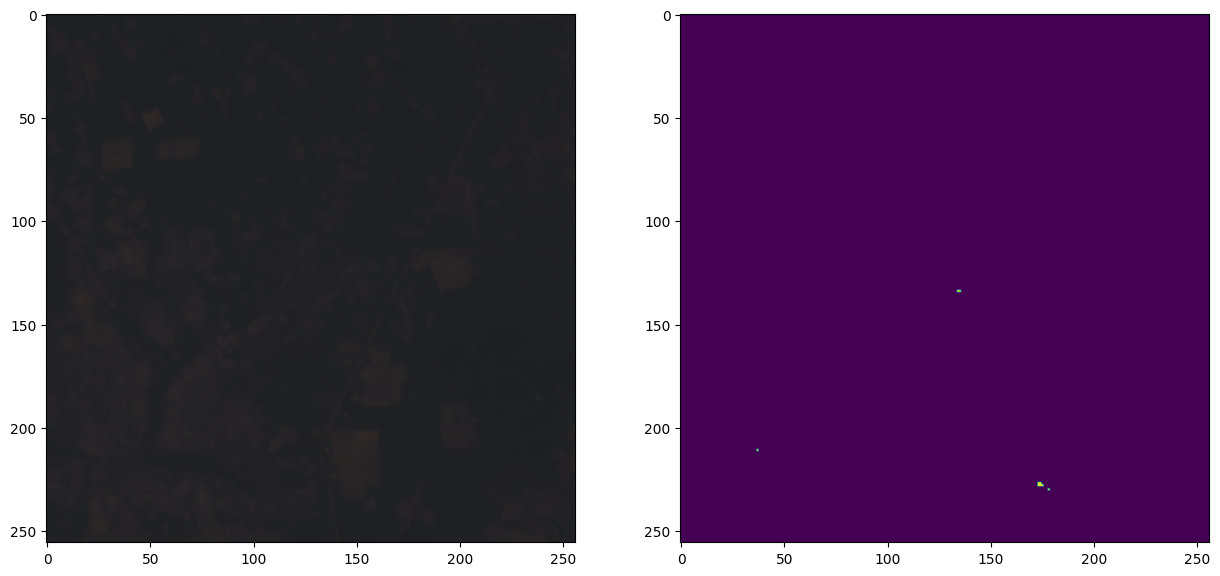

In [32]:
#rgb
rgb = [3,2,1]
fig,axs = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(15)
axs[0].imshow(img_8[:,:,rgb])
axs[1].imshow(mask)

/tmp/ipykernel_84638/1395636695.py:4: RuntimeWarning: invalid value encountered in divide
  NDVI = (NIR-R)/(NIR+R)


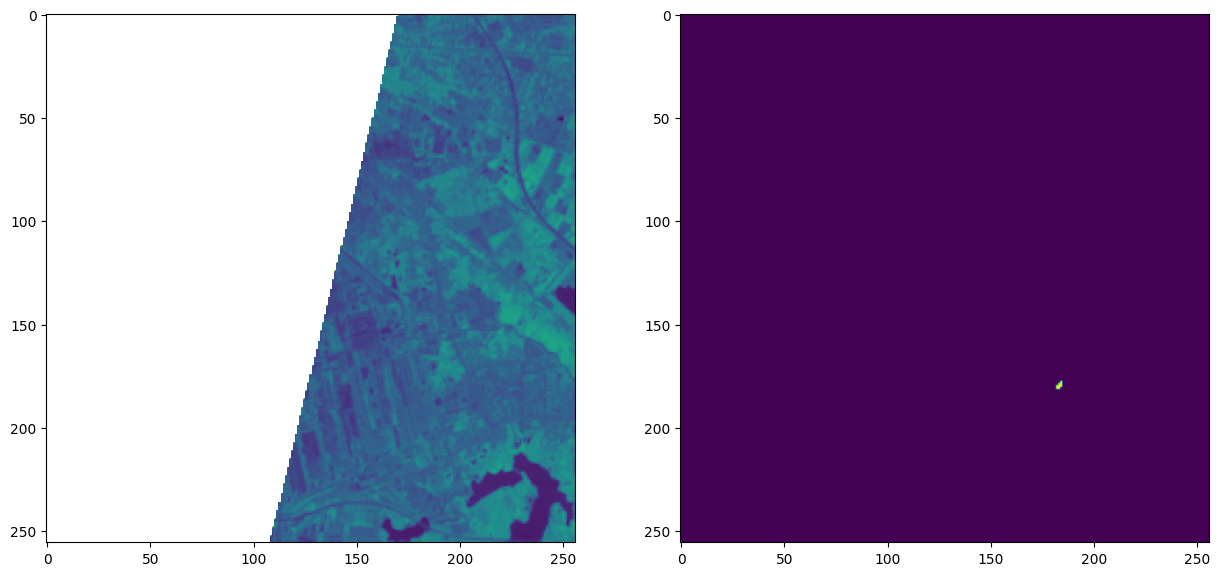

In [ ]:
# NDVI
NIR = img_8[:,:,4]
R = img_8[:,:,1]
NDVI = (NIR-R)/(NIR+R)
fig,axs = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(15)
axs[0].imshow(NDVI)
axs[1].imshow(mask)

/tmp/ipykernel_84638/3709927470.py:4: RuntimeWarning: invalid value encountered in divide
  NDVI = (NIR-R)/(NIR+R)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


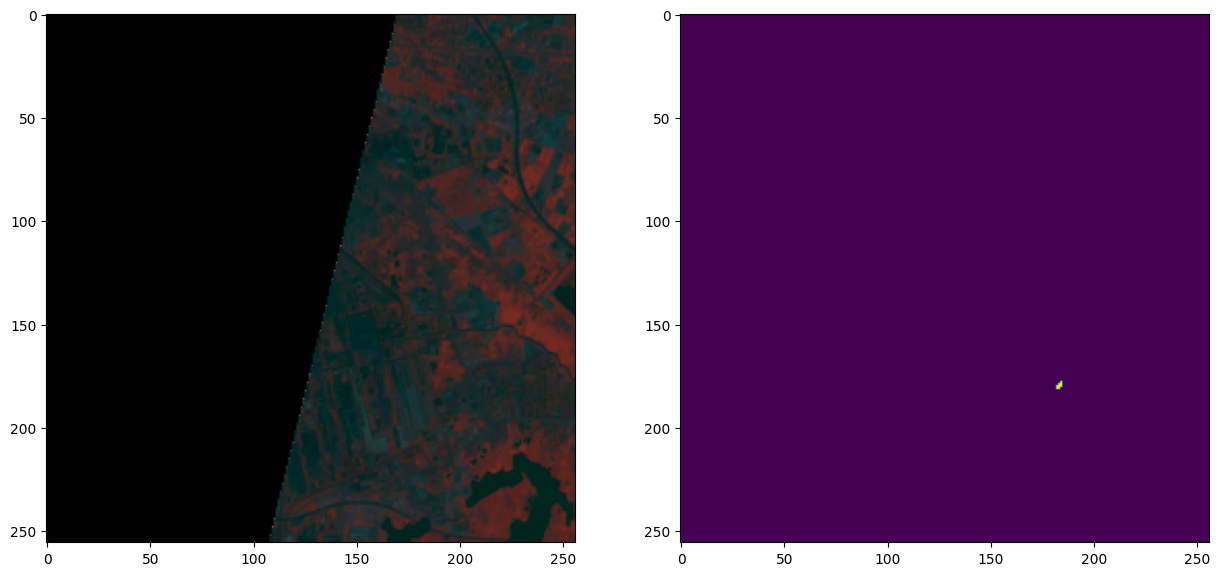

In [ ]:
# NDVI, G B
NIR = img_8[:,:,4]
R = img_8[:,:,1]
NDVI = (NIR-R)/(NIR+R)
G = img_8[:,:,2]
B = img_8[:,:,3]
ndvigb = np.stack([NDVI,G,B],axis=2)

fig,axs = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(15)
axs[0].imshow(ndvigb)
axs[1].imshow(mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


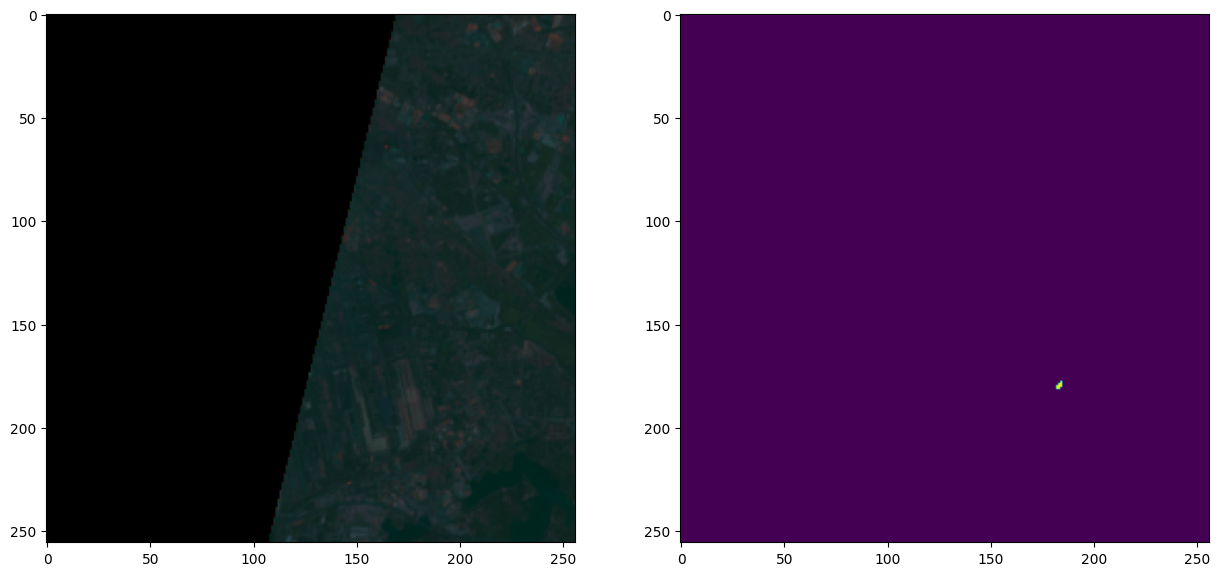

In [ ]:
# NDVI, SWIR1, B
agr=[4,5]
fig,axs = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(15)
c1 = (img_8[:,:,6]-img_8[:,:,7])
c2 = img_8[:,:,2]
c3 = img_8[:,:,3]

# c3 = np.zeros((256,256))
# c3 = NDVI

ndvigb = np.stack([c1,c2,c3],axis=2)
axs[0].imshow(ndvigb)
axs[1].imshow(mask)

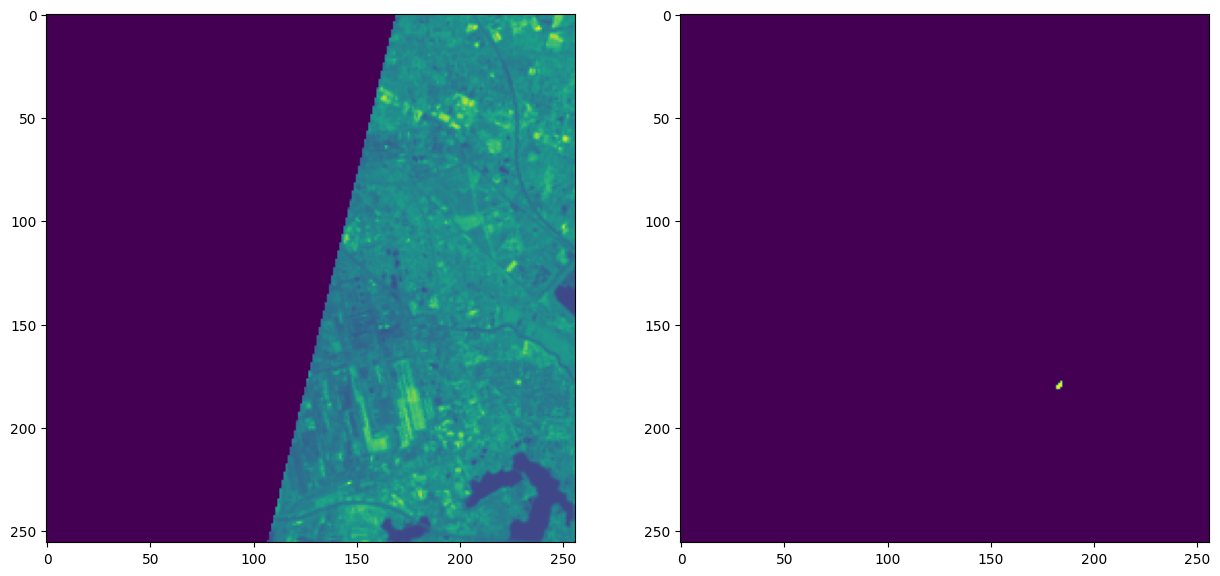

In [ ]:
# NDVI, SWIR1, B
agr=[4,5]
fig,axs = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(15)
c1 = (img_8[:,:,5]+img_8[:,:,6])

axs[0].imshow(c1)
axs[1].imshow(mask)

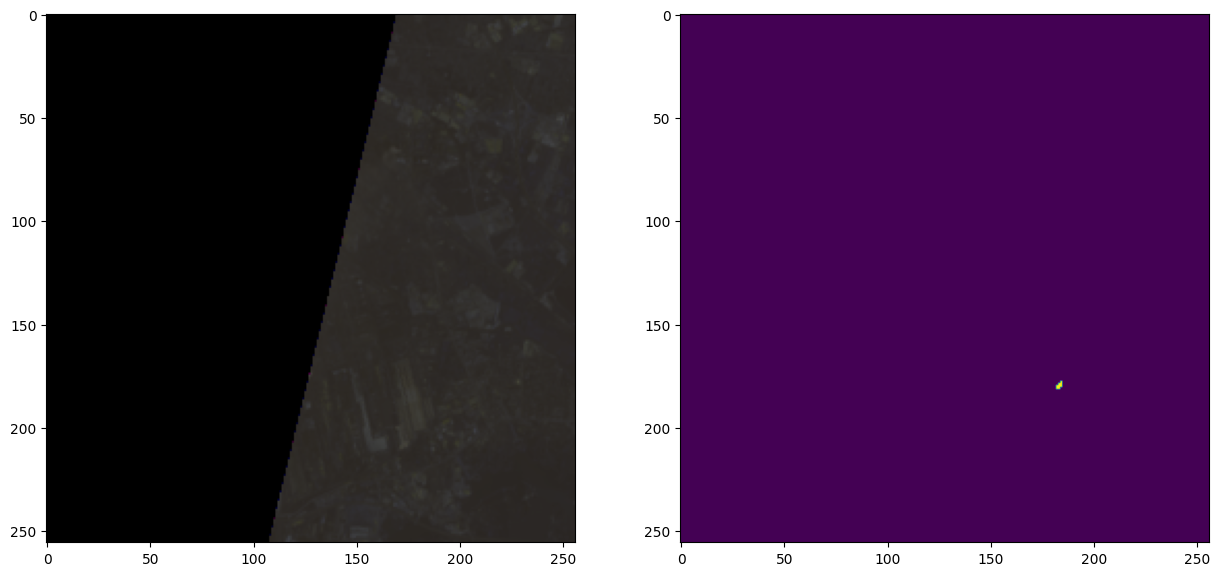

In [ ]:
agr=[0,1,2]
fig,axs = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(15)

axs[0].imshow(img_8[:,:,agr])
axs[1].imshow(mask)

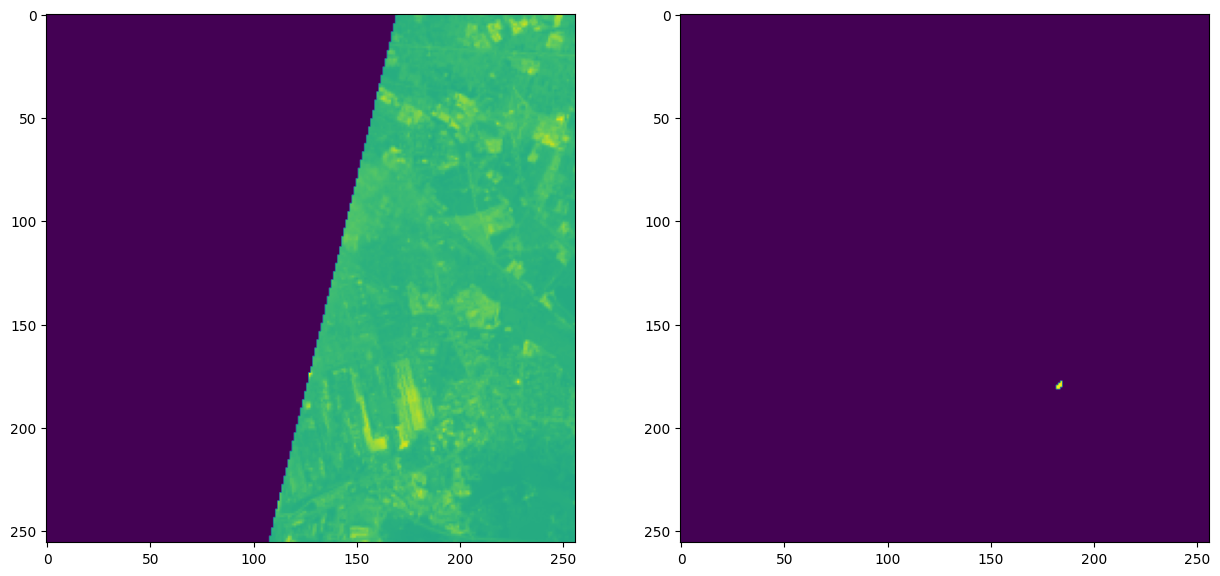

In [ ]:
fig,axs = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(15)
axs[0].imshow(img_8[:,:,0])
axs[1].imshow(mask)